# Lesson 11 - Dimensions and visualisation

> Introduction to dimensionality reduction and visualisation.

## Learning objectives
In this lecture we will have a look at dimensionality reduction and data visualisation. When we look at the feature vector of a dataset it can contain many features and each feature corresponds to its own dimension. In this notebook we will explore a method to reduce the dimensionality of a dataset. This method falls into the cateogory of unsupersvised algorithms. The learning objectives are to be able to answer the following questions:

* What is dimensionality reduction?
* When is dimensionality reduction useful?


## References

* Chapter 8: Dimensionality Reduction, Section PCA of _Hands-On Machine Learning with Scikit-Learn and TensorFlow_ by Aurèlien Geron
* [Santa2Graph: visualize high dimensional data with Giotto Mapper](https://towardsdatascience.com/visualising-high-dimensional-data-with-giotto-mapper-897fcdb575d7)

## Homework
As homework read the references, work carefully through the notebook and solve the exercises. This lecture covers several complex topics and it is important that you familiarise yourself by experimenting with the notebook.

## Principal component analysis

First we have a look at a method to reduce the dimensions of a dataset. There are two main reasons why we would like to reduce the dimensionality of such datasets:

1. Some machine learning algorithms struggle with high dimensional data.
2. It is hard to visualize high dimensional data. In practice it is hard to visualise datasets that have more than two or three dimensions.

There is one very common approach to reduce the dimensionality of data: principal component analysis (PCA). The idea is that not all axes (or in other words: dimensions in feature space) contain the same amount of variance and that there are even combinations of features that contain most variance. PCA seeks to find new coordinate axes (i.e. combined features, or "principal components") such that the variance of the new features, i.e. along the new axes, is maximised and ordered. The resulting first principal component contains most variance. The second principal component contains the second-most variance, etc.

### Imports

In [1]:
# dalineplotrangling
import pandas as pd
import numpy as np
from pathlib import Path
from tqdm import tqdm

# data viz
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.image as mpimg
import seaborn as sns

sns.set(color_codes=True)
sns.set_palette(sns.color_palette("muted"))

# ml magic
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_validate

# Helper function (L. von Werra)
def rmse(y, yhat):
    """A utility function to calculate the Root Mean Square Error (RMSE).
    
    Args:
        y (array): Actual values for target.
        yhat (array): Predicted values for target.
        
    Returns:
        rmse (double): The RMSE.
    """
    return np.sqrt(sklearn.metrics.mean_squared_error(y, yhat))


### Load the data
We will use the processed housing dataset for the principal component analysis. First we have to load it.

In [2]:
housing_data = pd.read_csv('housing_processed.csv')

In [3]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,city,rooms_per_household,bedrooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity_INLAND,ocean_proximity_<1H OCEAN,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,ocean_proximity_ISLAND
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,69,6.984127,1.023810,0.146591,2.555556,0,0,1,0,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,620,6.238137,0.971880,0.155797,2.109842,0,0,1,0,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,620,8.288136,1.073446,0.129516,2.802260,0,0,1,0,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,620,5.817352,1.073059,0.184458,2.547945,0,0,1,0,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,620,6.281853,1.081081,0.172096,2.181467,0,0,1,0,0


In [4]:
housing_data.shape

(19443, 19)

In [5]:
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,city,rooms_per_household,bedrooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity_INLAND,ocean_proximity_<1H OCEAN,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,ocean_proximity_ISLAND
count,19443.000000,19443.000000,19443.000000,19443.000000,19443.000000,19443.000000,19443.000000,19443.000000,19443.000000,19443.000000,19443.000000,19443.000000,19443.000000,19443.000000,19443.000000,19443.000000,19443.000000,19443.000000,19443.000000
mean,-119.560363,35.646739,28.435118,2617.678548,538.136964,1442.129970,501.427352,3.675099,191793.406162,541.629224,5.340245,1.091741,0.214812,3.095953,0.331482,0.439953,0.106774,0.121535,0.000257
std,2.002697,2.145335,12.504584,2179.553070,420.168532,1140.254218,383.064222,1.569687,96775.724042,260.704512,2.190405,0.429728,0.056667,10.679036,0.470758,0.496394,0.308833,0.326756,0.016035
min,-124.350000,32.550000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,1.000000,0.846154,0.333333,0.100000,0.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-121.760000,33.930000,18.000000,1438.500000,299.000000,799.000000,282.000000,2.526500,116700.000000,328.000000,4.412378,1.006140,0.177906,2.449692,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-118.490000,34.260000,29.000000,2111.000000,436.000000,1181.000000,411.000000,3.446400,173400.000000,545.000000,5.180451,1.048276,0.204545,2.841155,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-117.990000,37.730000,37.000000,3119.000000,644.000000,1746.500000,606.000000,4.579750,247100.000000,770.000000,5.963796,1.097701,0.240414,3.308208,1.000000,1.000000,0.000000,0.000000,0.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,499100.000000,977.000000,132.533333,34.066667,1.000000,1243.333333,1.000000,1.000000,1.000000,1.000000,1.000000


We drop the two columns that contain categorical data with many categories. We could create extra columns for each categoriy but since there are many of them that would create a lot of extra features.

In [6]:
try:
    housing_data.drop(['city', 'postal_code'], axis=1, inplace=True)
except:
    pass

Then we split the data into features and labels as usual:

In [7]:
X = housing_data.drop('median_house_value', axis=1)
y = housing_data['median_house_value']
feature_labels = X.columns

### Baseline
First we train a Random Forest with the settings we tuned in lesson 6 as a baseline for future model.

In [8]:
rf = RandomForestRegressor(n_estimators=100, max_features='sqrt', n_jobs=-1, random_state=42)
                             
results = cross_validate(rf, X, y,
                         cv=5,
                         return_train_score=True,
                         scoring='neg_root_mean_squared_error')
rmse_full = -np.mean(results["test_score"])

We get an RMSE of roughly 60'000:

In [9]:
print(f'RMSE: {rmse_full}')

RMSE: 60711.851611054604


### Standardisation
PCA works by finding new axes (i.e. new combinations of features) in the dataset that cover the most variance. Since variance is the average squared distance of each sample to the sample mean, this depends on the scale of the feature. To illustrate this think of two columns that contain the height of the person measured in centimeter and meter. Although height described in these two columns are the same the variance will be 10'000 times larger in the centimeter column (100^2) and the standard deviation 100 times larger.

In [10]:
rand_values = np.random.randn(1000)

In [11]:
rand_values.var() # variance of height in meters

0.9850270092161397

In [12]:
(100*rand_values).var() # variance of height in centimeters

9850.270092161396

For this reason it is important to **scale the features such that they are comparable to each other**. A common approach to do this is to transform the data such that the mean is zero and the standard deviation is one. The following formula achieves this:

$x_{std}=\frac{x_{old}-\mu}{\sigma}$

Scikit-learn provides a function to do this for us called `StandardScaler`. We can do this in one line with the function `.fit_transform()`. Similar to the function `fit_predict()` it combines the process of fitting (which in this case means calculating the mean and standard deviation of the dataset) and then transforming the data by applying the above described formula.

In [13]:
X_std = StandardScaler().fit_transform(X) # X_std are the scaled (standardized) features data X

In [14]:
X_std.shape

(19443, 18)

We can see that the mean is zero (or close enough) and the standard deviation is one:

In [15]:
X_std.mean(axis=0) # means of all features, i.e. mean across the rows (axis=0)

array([-4.44386137e-16,  2.19854194e-15,  9.35549763e-17, -2.48505406e-17,
       -1.02325755e-16,  7.74752147e-17, -1.24252703e-17, -1.40332464e-16,
       -4.67774881e-17, -1.00863959e-16,  1.58604921e-16, -4.67774881e-17,
       -1.31561685e-17,  1.60797615e-16,  1.43256057e-16,  6.13954532e-17,
       -3.14286248e-17,  1.16943720e-17])

In [16]:
X_std.std(axis=0) # standard deviations of all features, i.e. across the rows

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.])

### Principal component analysis

Now we apply principal component analysis to the standardised features. After initialising a `PCA` object we can use the `.fit_transform()` to find the principal components and then transform the dataset into these new coordinates.

> Note: You should never `fit_transform` the test set. Use it on the training set and apply the mean and standard deviation with `transform` to the test set. This is true for all data preprocessing.

In [17]:
pca = PCA()

In [18]:
X_pca = pca.fit_transform(X_std) # X_pca is the transformed feature set

We can see that the transformed dataset still has the same shape. However the columns are no longer the features but the coordinates of new principal components.

In [19]:
X_pca.shape

(19443, 18)

### Explained variance
The explained variance is an important concept in principal component analysis. It tells us **how much variance of the whole dataset is contained in a particular feauture**, i.e. along one principal component axis. A feature with more variation can encode more information than features with little variation. The explained variance is stored in the `pca` object and we can use it to visualise the distribution. The `explained_variance_ratio_` tells us the percentage of variance each component contains from the total variance.

In [20]:
pca.explained_variance_ratio_

array([2.19304226e-01, 1.49755775e-01, 1.20392807e-01, 9.57267069e-02,
       7.50868448e-02, 7.00686445e-02, 5.68770654e-02, 5.59583530e-02,
       5.28897862e-02, 4.08775051e-02, 3.45190876e-02, 1.54448129e-02,
       7.11148999e-03, 2.50841149e-03, 1.41645103e-03, 1.19453897e-03,
       8.67494223e-04, 1.43134409e-32])

In [21]:
pca_labels = [f'principal component {i+1}' for i in range(len(pca.explained_variance_ratio_))]

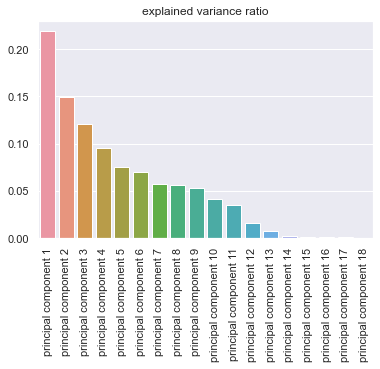

In [22]:
barplot = sns.barplot(x=pca_labels, y=pca.explained_variance_ratio_)
barplot.set_xticklabels(pca_labels, rotation=90)
plt.title('explained variance ratio')
plt.show()

We can see that already the first three components together account for 50% of the total variance in the dataset. We can visualise this more systematically by plotting the cumulative sum of the explained variance rations:

C:\Users\joelt\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


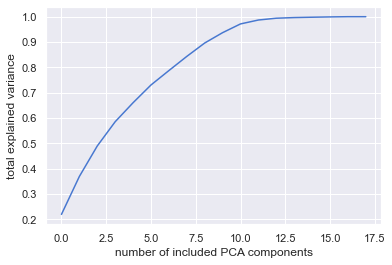

In [23]:
sns.lineplot(np.arange(len(pca.explained_variance_ratio_)), np.cumsum(pca.explained_variance_ratio_))
plt.ylabel('total explained variance')
plt.xlabel('number of included PCA components')
plt.show()

We see that with 7 of the 17 axes we already explain 90% percent of the variance in the dataset and that after 10 we almost reach 100%. That means the components 10-17 probably don't contain much information and can be discarded.

### PCA vector composition
Naturally, we would like to know what these principal components mean. For example the first component contains 25% of the total variance. What information is stored in that component? The `pca` object also contains the `components_` which define the transformation between the original dataset and the transformed  one. We can print a few of the components and interpret them:

In [24]:
def print_tabular(labels, values):
    df = pd.DataFrame(data=values, columns=labels)
    display(df.T)

In [25]:
print('The first three principal components:')
print_tabular(feature_labels, pca.components_[:3])

The first three principal components:


,0,1,2
longitude,0.097414,-0.444367,0.278119
latitude,-0.094526,0.512659,-0.225418
housing_median_age,-0.229015,-0.100595,-0.205643
total_rooms,0.480568,0.111517,0.003317
total_bedrooms,0.480851,0.048128,-0.113867
population,0.465910,-0.000587,-0.122304
households,0.482656,0.026048,-0.150227
median_income,0.083678,0.065498,0.374978
city,-0.017339,0.059983,-0.069207
rooms_per_household,0.029489,0.294399,0.522319


The way to read this table is to think of it as a recipe to construct the first three principal components coordinates from the original features. Given a new datapoint, we can, for example, calculate the first principal component by multiplying the longitude by the value in column `0` plus the latitude multiplied by the corresponding value in column `0` etc.. This weighted sum of the original features will yield the first coordinate in the PCA coordinate system.

${x_{PC,i}} = \sum_{i=0}^{n-1} w_{i,j} \cdot x_{feat, j}$

From this we can see that the first component mainly consists of the three features `total_rooms`, `total_bedrooms`, and `households`:

$x_{PC,0} = 0.096 \cdot longitude + (-0.093) \cdot lattidue + (-0.229) \cdot housing\_median\_value + \dots$

### Visualisation
We can now use the principle components to visualise the data. We have a closer look at the first two components.

C:\Users\joelt\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


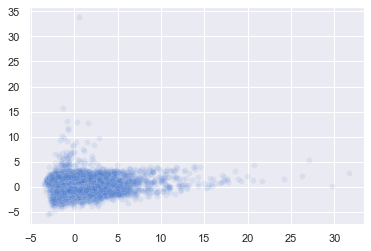

In [26]:
sns.scatterplot(X_pca[:,0], X_pca[:,1], alpha=0.1)
plt.show()

Let's look at a 2D histogram plot to get an idea of the density of points in the first two principal components:

C:\Users\joelt\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


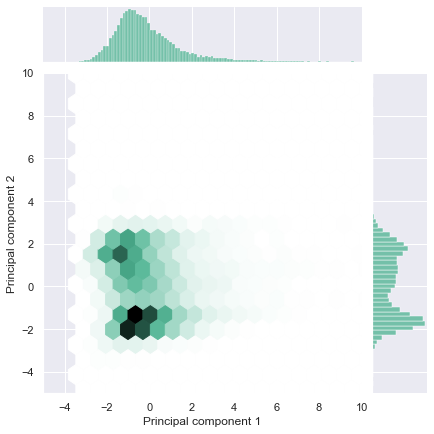

In [27]:
jplot = sns.jointplot(X_pca[:,0],  X_pca[:,1], kind="hex", color="#4CB391",xlim=[-5,10], ylim=[-5,10])
jplot.set_axis_labels('Principal component 1', 'Principal component 2')

We observe that there seem to be two visible clusters along these two axes. We could now investigate these clusters further and might find some property of the dataset that might be useful to us or our customer. Let's do it!

### Exercise 1
Create plots of other principal components and investigate if you find any interesting features.

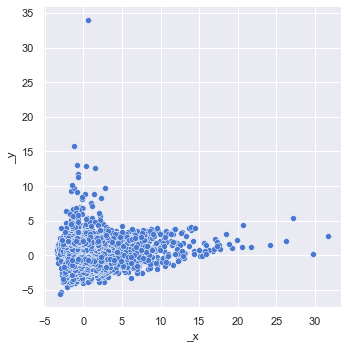

In [28]:
fig = sns.relplot(x=X_pca[:,0], y = X_pca[:,1])

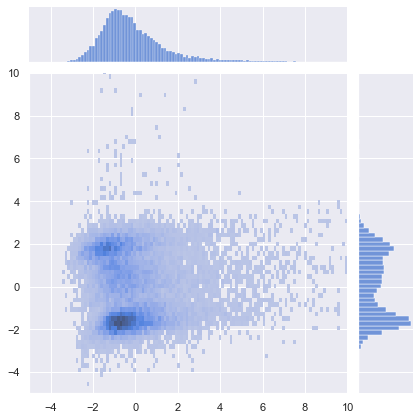

In [29]:
sns.jointplot( x=X_pca[:,0], y = X_pca[:,1], kind="hist", xlim=[-5,10], ylim=[-5,10])

In [30]:
type(X_pca)

numpy.ndarray

### Advanced: Cluster investigation
In this section we have a closer look at the clusters we observed in the previous plot. The clustering seems to mainly happen along the second principle component. Let's plot a fine-grained histogram of that component:

In [31]:
number_of_cols = 0

while True:
    try:
        number_of_cols += 1
        X_pca[:,number_of_cols]
    except:
        number_of_cols = number_of_cols -1
        break

print(number_of_cols)

17


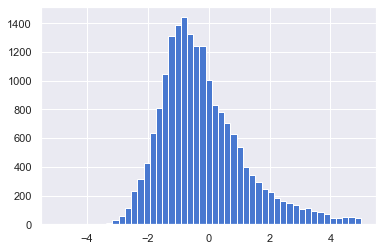

In [50]:
plt.hist(X_pca[:,0], bins=np.linspace(-5, 5, 50))
plt.show()

0


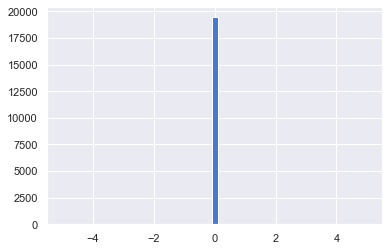

1


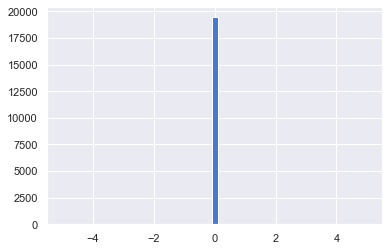

2


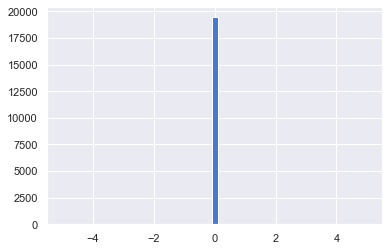

3


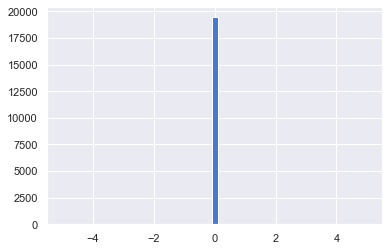

4


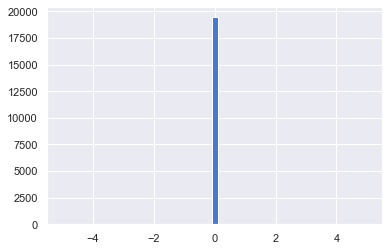

5


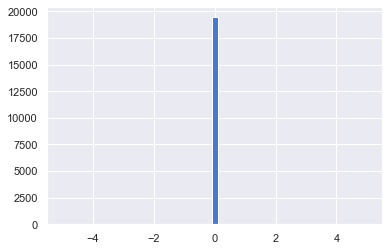

6


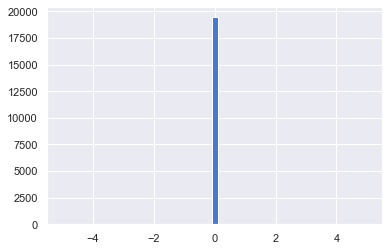

7


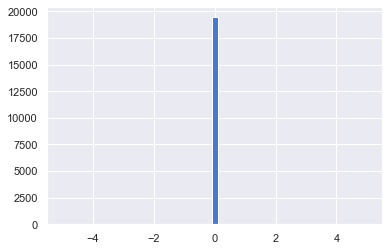

8


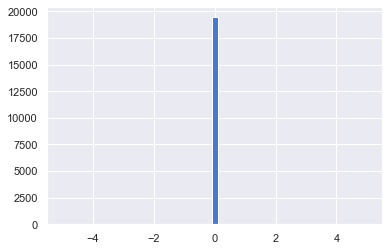

9


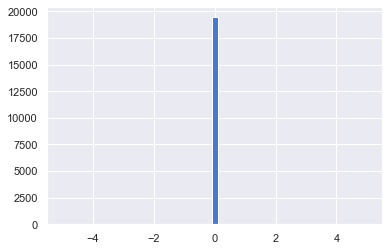

10


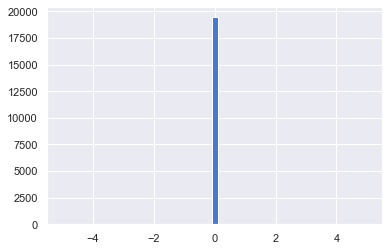

11


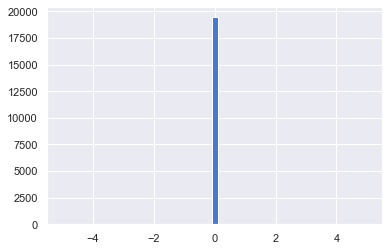

12


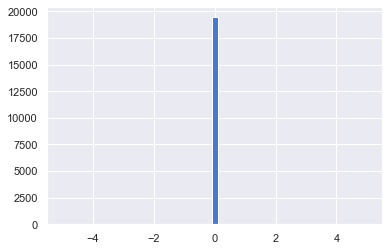

13


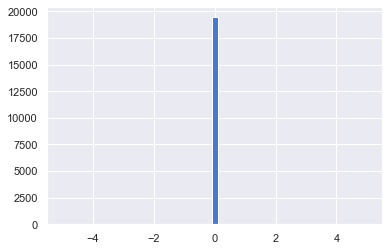

14


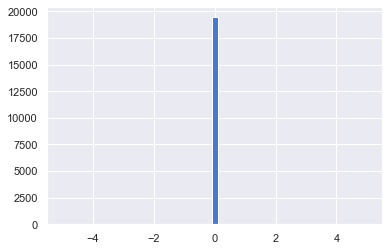

15


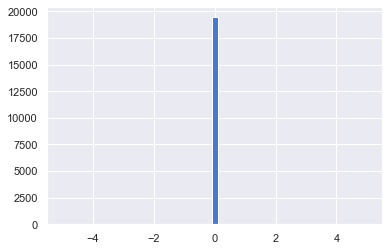

In [51]:
for i in range(number_of_cols-1):
    print(i)
    plt.hist(X_pca[:,number_of_cols], bins=np.linspace(-5, 5, 50))
    plt.show()

We can see that the clusters seem to be seperated around `-0.5`. We can create a mask for the data points that are below that threshold.

In [52]:
left_group = X_pca[:,1]<-0.5

Furthermore, we only want to investigate the features that contribute to the second principal component. Therefore, we set another threshold for the minimum absolute feature coefficient.

In [34]:
pc1_features = list(feature_labels[np.abs(pca.components_[1])>0.2])

These are the components that mainly contribute to the second principal component:

In [35]:
pc1_features

['longitude',
 'latitude',
 'rooms_per_household',
 'bedrooms_per_household',
 'bedrooms_per_room',
 'ocean_proximity_INLAND',
 'ocean_proximity_<1H OCEAN',
 'ocean_proximity_NEAR BAY']

Unfortunately, the `StandardScaler` transformed the DataFrame `X` into an array `X_std`. Let's transform it to a DataFrame again:

In [53]:
X_std = pd.DataFrame(data=X_std, columns=feature_labels)

With `loc` and the mask we just created we can now slice out the datapoints of the left and right group. We have a look at the statistics of the relevant features of the two groups with `.describe()`.

In [54]:
X_std.loc[left_group, pc1_features].describe()

,longitude,latitude,rooms_per_household,bedrooms_per_household,bedrooms_per_room,ocean_proximity_INLAND,ocean_proximity_<1H OCEAN,ocean_proximity_NEAR BAY
count,8601.000000,8601.000000,8601.000000,8601.000000,8601.000000,8601.000000,8601.000000,8.601000e+03
mean,0.771833,-0.859931,-0.236227,-0.098456,0.288596,-0.624882,0.726562,-3.457413e-01
std,0.370566,0.268997,0.522780,0.207821,1.182364,0.402678,0.804964,1.110288e-16
min,-1.577731,-1.443513,-2.051770,-1.764901,-1.787272,-0.704163,-0.886320,-3.457413e-01
25%,0.619362,-0.902791,-0.610046,-0.208714,-0.516708,-0.704163,1.128260,-3.457413e-01
50%,0.714236,-0.804902,-0.279114,-0.111288,0.106357,-0.704163,1.128260,-3.457413e-01
75%,0.874025,-0.734981,0.105547,-0.011789,0.865438,-0.704163,1.128260,-3.457413e-01
max,2.501871,1.367309,1.901482,2.484505,13.856510,1.420126,1.128260,-3.457413e-01


In [55]:
X_std.loc[~left_group, pc1_features].describe()

,longitude,latitude,rooms_per_household,bedrooms_per_household,bedrooms_per_room,ocean_proximity_INLAND,ocean_proximity_<1H OCEAN,ocean_proximity_NEAR BAY
count,10842.000000,10842.000000,10842.000000,10842.000000,10842.000000,10842.000000,10842.000000,10842.000000
mean,-0.612298,0.682186,0.187400,0.078106,-0.228944,0.495721,-0.576385,0.274278
std,0.914854,0.827018,1.223630,1.321142,0.752311,1.053224,0.726897,1.274126
min,-2.391655,-1.406222,-1.729046,-1.667938,-2.026123,-0.704163,-0.886320,-0.345741
25%,-1.298101,0.304511,-0.246729,-0.191183,-0.724533,-0.704163,-0.886320,-0.345741
50%,-0.943570,0.929138,0.056551,-0.092523,-0.310733,1.420126,-0.886320,-0.345741
75%,-0.039766,1.143562,0.387679,0.039664,0.144820,1.420126,-0.886320,-0.345741
max,2.621713,2.938200,58.069790,76.736388,6.453223,1.420126,1.128260,2.892336


> Note: The `~` operator creates the boolean complement. So `True` becomes `False` and vice versa.

Just looking at the feature mean of the two groups we see that there seems to be a significant difference between almost all features. To have a more detailed view let's compare the histograms of each feature:

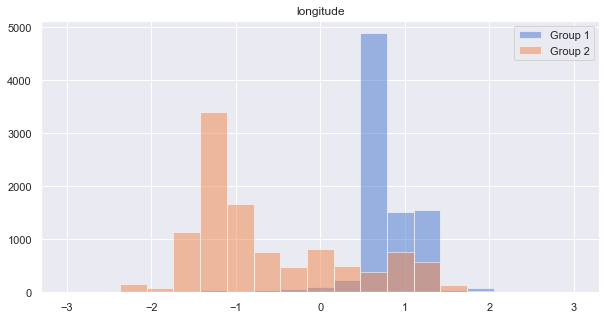

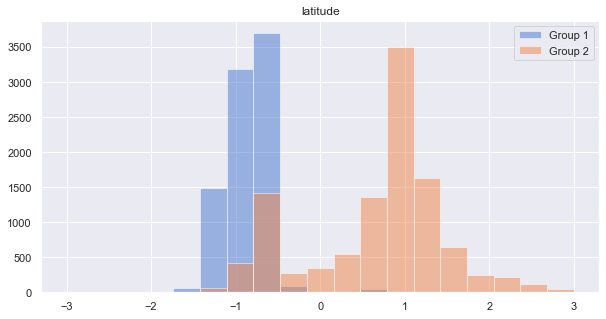

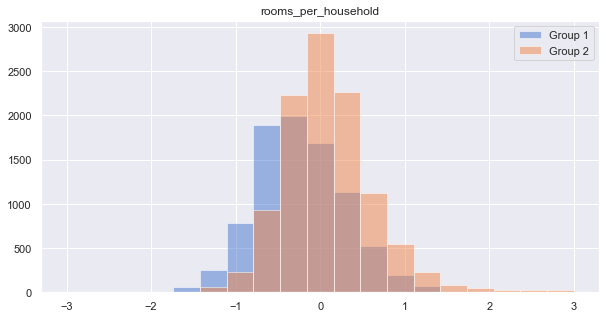

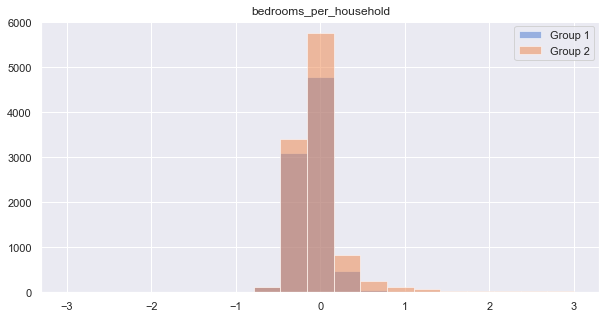

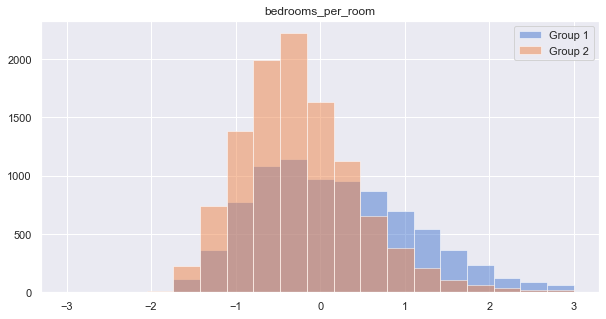

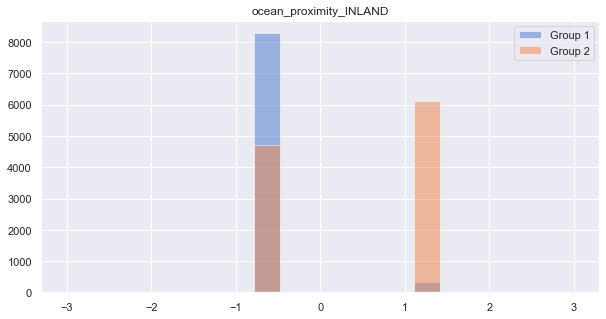

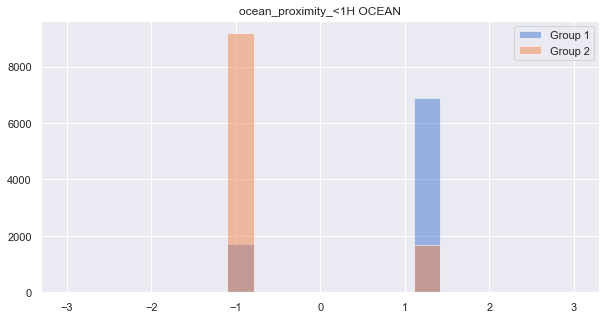

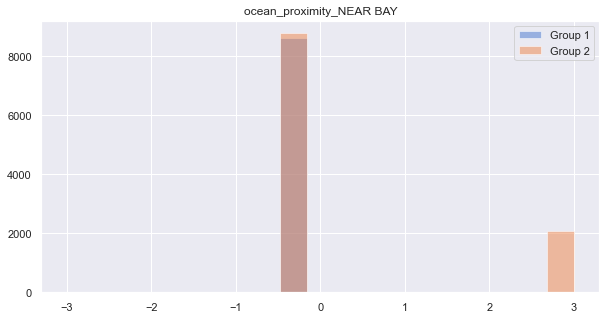

In [39]:
for col in pc1_features:
    bins = np.linspace(-3, 3, 20)
    fig, ax = plt.subplots(1,1, figsize=(10,5))
    X_std.loc[left_group, col].hist(ax=ax, bins=bins, color='C0', alpha=0.5, label='Group 1')
    X_std.loc[~left_group, col].hist(ax=ax, bins=bins, color='C1', alpha=0.5, label='Group 2')
    plt.legend(loc='best')
    plt.title(col)
    plt.show()

We can see that the most significant difference is between the longitute and latitude. Another interesting observation is that in the first group (blue) the rooms per household seem to be slightly lower and the bedrooms per room slightly higher. We will discuss further below. First we want to look at the longitude and latitude distribution of the two groups. First we make a hexplot to see the hotspots.

Group 1


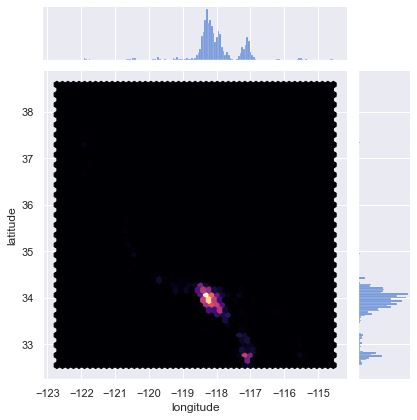

Group 2


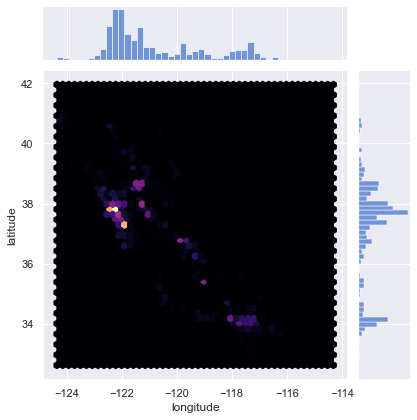

In [56]:
import matplotlib.gridspec as gridspec

print("Group 1")
sns.jointplot(
    kind='hex',
    x="longitude",
    y="latitude",
    cmap='magma',

    data=X.loc[left_group],
)
plt.show()

print("Group 2")
sns.jointplot(
    kind='hex',
    x="longitude",
    y="latitude",
    cmap='magma',
    data=X.loc[~left_group],
)
plt.show()

We see that in the first group there are mainly two hotspots while in the second group the hotspots seem to be further distributed. Recall that we can plot the longitude and latitude on top of a grid of California. Let's investigate what these hot regions correspond to.

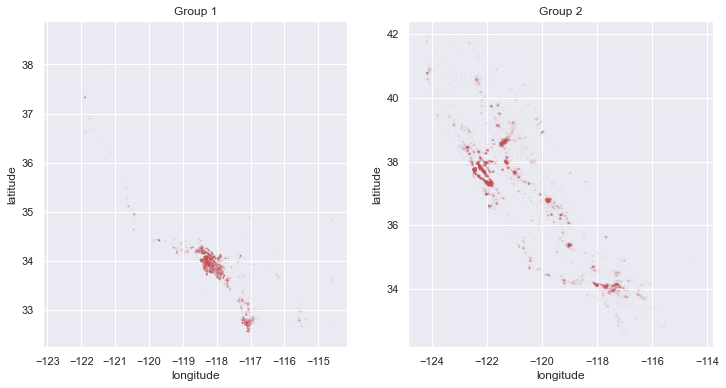

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(12,6))

fig = sns.scatterplot(
    x="longitude",
    y="latitude",
    data=X.loc[left_group],
    alpha=0.1,
    s=1,
    color="r",
    edgecolor="none", 
    ax=axes[0]
)

axes[0].set_title("Group 1")
fig = sns.scatterplot(
    x="longitude",
    y="latitude",
    data=X.loc[~left_group],
    alpha=0.05,
    s=3,
    color="r",
    edgecolor="none",
    ax=axes[1]
)

axes[1].set_title("Group 2")
plt.show()

Comparing to a satellite image of California, we see that the two hotspots in the first group correspond to Los Angeles and San Diego. The second group mainly includes San Francisco, the Silicon Valley, Sacramento, Fresno and Bakersfield. What is interesting to observe is that the second group also includes Riverside which is just next to Los Angeles. That means that **the second principal component is not just the diagonal along the coast but specifically encodes Los Angeles and San Diego**. If one wanted to build a classifier to determine whether a house is in Los Angeles or an other region of California one would only need to look at the second principle component of the dataset.

Circling back the observation about the rooms per households. It seems that in Los Angeles the appartments have slightly fewer rooms than the rest of California but a similar amount of bedrooms, hence the higher number of bedrooms per rooms. In other words in Los Angeles you would get less extra rooms per household.

Finally, we can also look at the median value of the houses in the two groups:

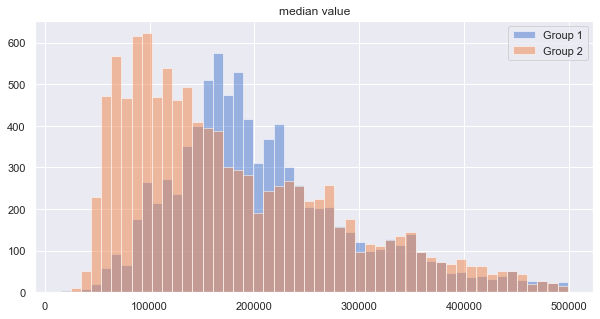

In [42]:
bins=50
fig, ax = plt.subplots(1,1, figsize=(10,5))
y.loc[left_group].hist(ax=ax, bins=bins, color='C0', alpha=0.5, label='Group 1')
y.loc[~left_group].hist(ax=ax, bins=bins, color='C1', alpha=0.5, label='Group 2')
plt.legend(loc='best')
plt.title('median value')
plt.show()

One observes that the median value is higher for the first group (Los Angeles & San Diego). However, the long tail in both groups is quite similar. So living seems to be more expensive for low and medium income people while for the upper class the prices seem to be comparable.

### Compressed model
Now we want to use PCA to build a model that is more compact than the model that utilizes all features. We add one principal component after the other and measure how well a Random Forest performs with this subset of features. We do this in our standard cross-validation loop.

In [57]:
rmse_valid =[]
for i in tqdm(range(1, 18)):
    rf = RandomForestRegressor(n_estimators=100, max_features='sqrt', n_jobs=-1, random_state=42)
                             
    results = cross_validate(rf, X_pca[:, :i], y, cv=5,
                             return_train_score=True,
                             scoring='neg_root_mean_squared_error')
    rmse_valid.append(-np.mean(results["test_score"]))

100%|██████████| 17/17 [02:41<00:00,  9.48s/it]


Now we can plot the performances with the full Random Forest as baseline for all subsets of components.

C:\Users\joelt\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'RMSE')

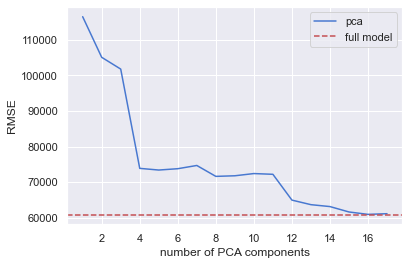

In [58]:
lineplot = sns.lineplot(np.arange(len(rmse_valid))+1 , rmse_valid, label='pca')
lineplot.axhline(rmse_full, c='r', linestyle='--', label='full model')
plt.legend(loc='best')
plt.xlabel('number of PCA components')
plt.ylabel('RMSE')

So we can see that already with 4-7 principal components we get results that are quite close to the full model. As mentioned previously this has two advantages:
1. Visualising 4 components is still hard but feasable compared to 17
2. Training a Random Forest with half the features is twice as fast for training and inference.

Looking at the graph we see that there are several steep steps. It seems that adding these components improved the performance significantly. By taking the components with the biggest steps we can try to build a better selection of features:

In [45]:
features = [0,1,3,6,10] # features that cause steep reductions in the RMSE of the above plot 

In [59]:
rf = RandomForestRegressor(n_estimators=100, max_features='sqrt', n_jobs=-1, random_state=42)
                             
results = cross_validate(rf, X_pca[:, features], y, cv=5,
                         return_train_score=True,
                         scoring='neg_root_mean_squared_error')
rmse_pca = -np.mean(results["test_score"])

In [47]:
rmse_pca

74891.73974407036

With just 5 of 17 features we achieve similar accuracy (within less than 10%) as the original model that used all 17 features. The compressed model with the 5 features is 3-4 times faster to train and to make predictions. In practice there are further ways of finding the best subset of features such as *forward* and *backward selection* (see [link](https://www.kdnuggets.com/2018/06/step-forward-feature-selection-python.html)).

### Exercise 2
Make your own selection of principle components (e.g. the first five) and see if you can beat the selection above.